In [ ]:
"""The code imports three libraries: cv2 (OpenCV), numpy, and matplotlib.pyplot.

cv2 is a library for computer vision tasks, including image and video processing.
numpy is a library for numerical computations in Python, providing support for arrays and mathematical operations.
matplotlib.pyplot is a plotting library used for creating visualizations and graphs."""

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""The code net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg") reads a pre-trained YOLOv3 (You Only Look Once) model from the-
specified weights and configuration files.

Here's a breakdown of the function call:

cv2.dnn refers to the deep neural network module in OpenCV.
readNet() is a function within the cv2.dnn module used to load a neural network model.
"yolov3.weights" is the filename of the pre-trained weights file for the YOLOv3 model.
"yolov3.cfg" is the filename of the configuration file that defines the architecture and settings of the YOLOv3 model.
By calling cv2.dnn.readNet(), the function loads the YOLOv3 model from the weights and configuration files and assigns it to- 
 the variable net. This allows you to use the loaded model for object detection or other computer vision tasks."""

In [3]:
# Load YOLOv3 weights and configuration files
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [ ]:
"""The code snippet reads the contents of a file named "coco.names" and stores each line of the file as a string element in the-
 classes list. It then prints the contents of the classes list.

Here's a breakdown of the code:

classes = []: Initializes an empty list called classes to store the names of the classes.

with open("coco.names", "r") as f:: Opens the file named "coco.names" in read mode. The file is opened using a context manager,
 which ensures that the file is properly closed after it has been read.

classes = [line.strip() for line in f.readlines()]: Reads all the lines from the file and creates a list comprehension. Each-
 line is stripped of leading and trailing whitespaces using the strip() method, and the resulting string is added to the-
 classes list.

print(classes): Prints the contents of the classes list, which now contains the names of classes read from the "coco.names"-
 file."""

In [4]:
# Load class names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
"""The code snippet retrieves the names of the output layers of a neural network model loaded in the variable `net` using YOLOv3-
 architecture.

Here's a breakdown of the code:

1. `layer_names = net.getLayerNames()`: `net.getLayerNames()` returns a list of all the names of the layers in the neural-
    network model. The code assigns this list to the variable `layer_names`.

2. `output_layer_names = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]`: `net.getUnconnectedOutLayers()` returns-
    the indices of the output layers of the model. The code then creates a new list called `output_layer_names`, where each-
    element is the name of the corresponding output layer obtained from `layer_names`. The `-1` adjustment in indexing is-
    necessary because layer indices start from 1 in OpenCV, while list indices start from 0.

3. `print(output_layer_names)`: Prints the names of the output layers. These output layers are typically the final layers of-
    the neural network that produce the predictions or feature maps used for further processing, such as object detection or-
    classification.

Overall, this code is used to identify and retrieve the names of the output layers in the YOLOv3 model loaded in `net`. The-
 output layer names are often important for extracting the relevant information from the model's output during inference."""

In [5]:
# Set input and output layers
#layer_names = net.getLayerNames()
#try:
#    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
#except:
#    print("Error: Failed to get unconnected output layers")

layer_names = net.getLayerNames()
output_layer_names = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print(output_layer_names)

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
"""The code performs preprocessing steps on an image before feeding it into a neural network for object detection or
 other computer vision tasks using the YOLOv3 model.

Here's a breakdown of the code:

img = cv2.imread("img1.jpg"): Reads and loads an image file named "img1.jpg" using the cv2.imread() function. The loaded image
 is stored in the img variable.

height, width, channels = img.shape: Obtains the height, width, and number of channels (color channels) of the image using the
 shape attribute of the img variable. This information is stored in separate variables for later use.

 blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False): Preprocesses the image into a format suitable
 for inputting into the YOLOv3 model. The cv2.dnn.blobFromImage() function takes the following arguments:

img: The input image to be preprocessed.
1/255.0: The scaling factor to normalize pixel values in the range of 0 to 1.
(416, 416): The size to which the input image is resized.
swapRB=True: Specifies whether to swap the color channels from BGR (Blue-Green-Red) to RGB.
crop=False: Determines whether to crop the image or pad it with zeros to match the desired input size.
The function applies the necessary preprocessing operations, such as resizing, normalization, and channel swapping, to convert
 the image into a blob. A blob is a multi-dimensional array that can be efficiently processed by the neural network.

The resulting blob is assigned to the variable blob and can be passed as input to the YOLOv3 model for object detection or
 other tasks.

Overall, this code reads an image file, obtains its dimensions, and preprocesses it into a blob format suitable for feeding
 into the YOLOv3 model."""

In [6]:
# Load image and prepare for inference
img = cv2.imread("img1.jpg")
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

In [ ]:
""" The code sets the input of a neural network model loaded in the variable `net` with a preprocessed image blob 
 and performs forward propagation to obtain the output predictions or feature maps from the specified output layers.

 Here's a breakdown of the code:

 1. `net.setInput(blob)`: Sets the input of the neural network model `net` with the preprocessed image blob (`blob`) obtained 
     from the previous step. This step prepares the model to process the input image.

 2. `outs = net.forward(output_layer_names)`: Performs forward propagation on the neural network model `net` using the 
     specified output layer names (`output_layer_names`). This step propagates the input image forward through the model and 
     computes the output predictions or feature maps from the specified output layers.

    The `net.forward()` method takes the output layer names as an argument and returns the output values. These output values 
 contain the predictions or feature maps generated by the model for the given input image.

    The resulting output is assigned to the variable `outs`, which can be further processed and analyzed to obtain the desired 
     results, such as object detection bounding boxes, class probabilities, or other relevant information.

 Overall, this code sets the input of the neural network model with a preprocessed image blob and performs forward propagation 
 to obtain the output predictions or feature maps from the specified output layers. This is a crucial step in the inference 
 process of object detection or other computer vision tasks using the YOLOv3 model."""

In [7]:
# Pass image through the network
net.setInput(blob)
outs = net.forward(output_layer_names)

In [ ]:
""" The code processes the output of the neural network model to extract the relevant information about the detected 
 objects, including their bounding boxes, class IDs, and confidences.

 Here's a breakdown of the code:

 1. `class_ids = []`, `confidences = []`, `boxes = []`: Initializes three empty lists to store the class IDs, confidences, 
     and bounding boxes of the detected objects.

 2. `for out in outs:`: Iterates over the outputs (`outs`) obtained from the neural network model for each specified output 
         layer.

 3. `for detection in out:`: Iterates over each detection in the current output.

 4. `scores = detection[5:]`: Extracts the confidence scores for each class from the detection output. The first five elements 
     of the `detection` array typically represent the bounding box coordinates and other information.

 5. `class_id = np.argmax(scores)`: Determines the class ID with the highest confidence by finding the index of the maximum 
     score in the `scores` array using `np.argmax()`.

 6. `confidence = scores[class_id]`: Retrieves the confidence score corresponding to the selected class ID.

 7. `if confidence > 0.5:`: Checks if the confidence score is above a certain threshold (0.5 in this case). If the condition 
         is met, it means an object of interest has been detected.

 8. The following lines calculate and store the information related to the detected object:
    - The coordinates of the center (`center_x` and `center_y`) of the bounding box relative to the width and height of the 
 input image.
    - The width (`w`) and height (`h`) of the bounding box relative to the width and height of the input image.
    - The top-left corner (`x` and `y`) of the bounding box by subtracting half of the width and height from the center 
 coordinates.
    - The bounding box coordinates (`x`, `y`, `w`, `h`) are appended to the `boxes` list.
    - The confidence score is converted to a float and appended to the `confidences` list.
    - The class ID is appended to the `class_ids` list.

 Overall, this code processes the output of the neural network model, filters out detections below a certain confidence 
 threshold, and extracts the class IDs, confidences, and bounding box coordinates of the detected objects. This information 
 can be further utilized for tasks such as drawing bounding boxes, labeling objects, or performing additional analysis."""

In [8]:
# Process detections
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
""" The code applies Non-Maximum Suppression (NMS) to filter out overlapping bounding boxes and keep only the most 
 confident and non-overlapping detections.

 Here's a breakdown of the code:

 1. `indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)`: The `cv2.dnn.NMSBoxes()` function takes the following 
     arguments:

    - `boxes`: A list of bounding box coordinates (`[x, y, w, h]`) for the detected objects.
    - `confidences`: A list of confidence scores for the detected objects.
    - `0.5`: The threshold value used for deciding whether two bounding boxes overlap significantly. If the Intersection over 
     Union (IoU) between two boxes is above this threshold, the box with the lower confidence score is suppressed.
    - `0.4`: The threshold value used to determine the minimum confidence score required for a detection to be considered 
     during NMS. Detections with confidence scores below this threshold are discarded.

    The `cv2.dnn.NMSBoxes()` function performs NMS and returns the indexes of the bounding boxes that survived the suppression 
     process, indicating the indexes of the selected detections that are non-overlapping and above the confidence threshold.

    The resulting `indexes` variable contains the filtered indexes of the bounding boxes that passed the NMS step and can be 
    used to retrieve the corresponding bounding boxes, confidences, and class IDs for further processing or visualization.

 Overall, this code applies NMS to the detected bounding boxes and their associated confidences, discarding overlapping boxes 
 and keeping the most confident and non-overlapping detections based on the specified thresholds."""

In [9]:
# Apply non-maximum suppression to remove overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
""" The code performs visual annotations on the original image by drawing bounding boxes around the detected objects 
 and overlaying text labels with class names and confidence scores.

 Here's a breakdown of the code:

 1. `font = cv2.FONT_HERSHEY_PLAIN`: Specifies the font type for the text annotations.

 2. `colors = np.random.uniform(0, 255, size=(len(classes), 3))`: Generates an array of random colors, where each color is 
     represented by an RGB value. The array has a size of `(number of classes, 3)`, and each class will be assigned a random 
     color.

 3. `if len(indexes) > 0:`: Checks if there are any indexes (detections) after NMS has been applied.

 4. `for i in indexes.flatten():`: Iterates over each index (detection) obtained from the filtered indexes.

 5. `x, y, w, h = boxes[i]`: Retrieves the bounding box coordinates (`x`, `y`, `w`, `h`) of the current detection using the 
     index `i`.

 6. `label = classes[class_ids[i]]`: Retrieves the class label name corresponding to the class ID of the current detection 
     using the index `i`.

 7. `confidence = confidences[i]`: Retrieves the confidence score of the current detection using the index `i`.

 8. `color = colors[class_ids[i]]`: Retrieves the color assigned to the current class ID.

 9. `cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)`: Draws a rectangle around the object using the calculated bounding box 
     coordinates. The rectangle is drawn on the `img` image, with the specified color and line thickness of 2.

 10. `text = f"{label} {confidence:.2f}"`: Creates a text string that combines the class label and confidence score, formatted 
     to two decimal places.

 11. `cv2.putText(img, text, (x, y-5), font, 2, color, 2)`: Overlays the text string on the `img` image, positioned slightly 
     above the top-left corner of the bounding box. The text is displayed using the specified font, font size of 2, color, and 
     line thickness of 2.

 12. `print(text)`: Prints the text string, which includes the class label and confidence score, for debugging or information 
     purposes.

 Overall, this code iterates over the filtered indexes of the bounding boxes, retrieves the necessary information for each 
 detection, and adds visual annotations to the original image by drawing bounding boxes and overlaying text labels. The result 
 is an image with annotated detections displayed on it."""

In [10]:
# Draw boxes and labels on image
#font = cv2.FONT_HERSHEY_PLAIN
#colors = np.random.uniform(0, 255, size=(len(classes), 3))
#if len(indexes) > 0:
#    for i in indexes.flatten():
#        x, y, w, h = boxes[i]
#        label = classes[class_ids[i]]
#        confidence = confidences[i]
#        color = colors[class_ids[i]]
#        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
#        cv2.putText(img, f"{label} {confidence:.2f}", (x, y-5), font, 1, color, 1)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))
if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        text = f"{label} {confidence:.2f}"
        cv2.putText(img, text, (x, y-5), font, 2, color, 2)
        print(text)

person 1.00
bicycle 1.00
backpack 0.99
car 0.96
dog 0.81


In [ ]:
""" The code displays the annotated image using two different methods: using OpenCV's `imshow()` function and using 
     matplotlib's `imshow()` function from the pyplot module.

 Here's a breakdown of the code:

 1. `cv2.imshow("Image", img)`: Displays the annotated image using OpenCV's `imshow()` function. The first argument `"Image"` 
     specifies the window name, and the second argument `img` is the image to be displayed. This function opens a new window 
     and shows the image with the applied annotations.

 2. `cv2.waitKey(0)`: Pauses the program and waits for a key press. This line ensures that the image window remains open until 
     a key is pressed.

 3. `cv2.destroyAllWindows()`: Closes all open windows created by OpenCV. This line ensures that all image windows are closed 
     after the `waitKey()` function returns.

 4. `img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`: Converts the image from the BGR color space (used by OpenCV) to the RGB 
     color 
     space (used by matplotlib). This conversion is necessary because OpenCV and matplotlib use different color channel orders.

 5. `plt.imshow(img)`: Displays the annotated image using matplotlib's `imshow()` function from the pyplot module. This 
     function displays the image in a new window or notebook cell, using the RGB color space.

 6. `plt.show()`: Shows the image in the matplotlib window or notebook cell. This line ensures that the image is displayed.

 Overall, these code snippets allow you to visualize the annotated image using both OpenCV and matplotlib. The `imshow()` 
 functions are used to display the image, while `waitKey()` and `destroyAllWindows()` ensure the windows are handled correctly 
 when using OpenCV. The conversion from BGR to RGB is necessary to display the image correctly using matplotlib."""

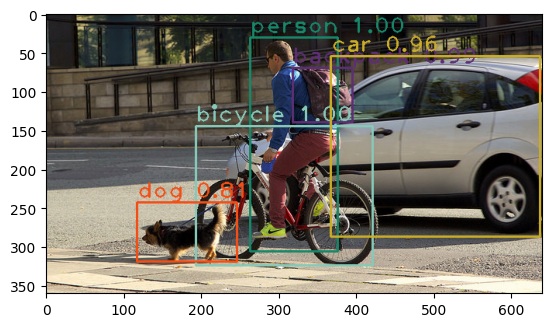

In [11]:
# Display image
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()